# Pandas III

_June 25, 2020_

Agenda today:
- Groupby in Pandas
- Combining dataframes
- Stacking & Unstacking

# Part I. Groupby In Pandas

Sometimes we might want to calculate summary statistics for groups in dataframe. So before we explore grouping and aggregating, let's review some basic statistical methods in pandas.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_columns", None)

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv')
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
continent                       170 non-null object
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [5]:
# check for missing value 
df.isnull().sum().sort_values(ascending = False)

continent                       23
total_litres_of_pure_alcohol     0
wine_servings                    0
spirit_servings                  0
beer_servings                    0
country                          0
dtype: int64

In [6]:
# calculate mean beer_servings
df.beer_servings.mean()

106.16062176165804

In [7]:
# calculate summary statistics for all measurements
df.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [8]:
# calculate the correlation between these variables
df.corr()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.458819,0.527172,0.835839
spirit_servings,0.458819,1.000000,0.194797,0.654968
wine_servings,0.527172,0.194797,1.000000,0.667598
total_litres_of_pure_alcohol,0.835839,0.654968,0.667598,1.000000


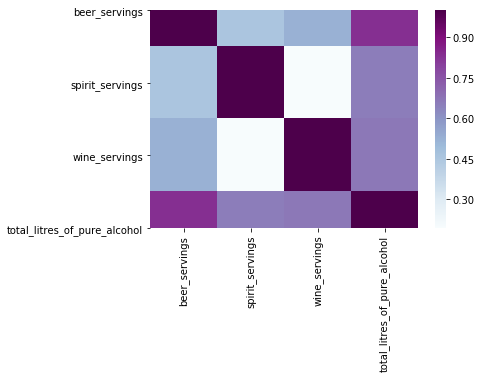

In [22]:
# visualize the correlation
# pd.plotting.scatter_matrix(df, figsize = (15, 10))
sns.heatmap(df.corr(), cmap = 'BuPu')

In [24]:
# how could we view summary statistics for categorical variable?
df.country.value_counts()
# get how many entries are in each continent
df.continent.value_counts()


AF    53
EU    45
AS    44
OC    16
SA    12
Name: continent, dtype: int64

#### Groupby
Groupby methods in Pandas allow you to aggregate data and perform operations on them. The method can be summarized as split-apply-combine. The groupby function allow us to split the dataframe into _groups_, apply operations on them, and aggregate a final result. Let's look at some examples. 

In [26]:
# review summary statistics for each continent (use describe)
df.groupby(['continent']).describe()

beer_servings                                                      \
                  count        mean        std   min     25%    50%     75%   
continent                                                                     
AF                 53.0   61.471698  80.557816   0.0   15.00   32.0   76.00   
AS                 44.0   37.045455  49.469725   0.0    4.25   17.5   60.50   
EU                 45.0  193.777778  99.631569   0.0  127.00  219.0  270.00   
OC                 16.0   89.687500  96.641412   0.0   21.00   52.5  125.75   
SA                 12.0  175.083333  65.242845  93.0  129.50  162.5  198.00   

                 spirit_servings                                             \
             max           count        mean        std   min    25%    50%   
continent                                                                     
AF         376.0            53.0   16.339623  28.102794   0.0   1.00    3.0   
AS         247.0            44.0   60.840909  84.362160   0.0   1.00   16.0   
EU         361.0            45.0  132.555556  77.589115   0.0  81.00  122.0   
OC         306.0            16.0   58.437500  70.504817   0.0  18.00   37.0   
SA         333.0            12.0  114.750000  77.077440  25.0  65.75  108.5   

                         wine_servings                                    \
              75%    max         count        mean        std  min   25%   
continent                                                                  
AF          19.00  152.0          53.0   16.264151  38.846419  0.0   1.0   
AS          98.00  326.0          44.0    9.068182  21.667034  0.0   0.0   
EU         173.00  373.0          45.0  142.222222  97.421738  0.0  59.0   
OC          65.25  254.0          16.0   35.625000  64.555790  0.0   1.0   
SA         148.75  302.0          12.0   62.416667  88.620189  1.0   3.0   

                                total_litres_of_pure_alcohol            \
             50%     75%    max                        count      mean   
continent                                                                
AF           2.0   13.00  233.0                         53.0  3.007547   
AS           1.0    8.00  123.0                         44.0  2.170455   
EU         128.0  195.00  370.0                         45.0  8.617778   
OC           8.5   23.25  212.0                         16.0  3.381250   
SA          12.0   98.50  221.0                         12.0  6.308333   

                                                     
                std  min   25%    50%     75%   max  
continent                                            
AF         2.647557  0.0  0.70   2.30   4.700   9.1  
AS         2.770239  0.0  0.10   1.20   2.425  11.5  
EU         3.358455  0.0  6.60  10.00  10.900  14.4  
OC         3.345688  0.0  1.00   1.75   6.150  10.4  
SA         1.531166  3.8  5.25   6.85   7.375   8.3

In [28]:
# aggregate basic functions
df.groupby(['continent']).wine_servings.agg(['min', 'max'])

,min,max
continent,,
AF,0,233
AS,0,123
EU,0,370
OC,0,212
SA,1,221


In [45]:
# only want sum stats for total litres grouped by continent
df.groupby(['continent']).total_litres_of_pure_alcohol.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,3.007547,2.647557,0.0,0.70,2.30,4.700,9.1
AS,44.0,2.170455,2.770239,0.0,0.10,1.20,2.425,11.5
EU,45.0,8.617778,3.358455,0.0,6.60,10.00,10.900,14.4
OC,16.0,3.381250,3.345688,0.0,1.00,1.75,6.150,10.4
SA,12.0,6.308333,1.531166,3.8,5.25,6.85,7.375,8.3


In [43]:
# with aggregate functions and group by, we can answer questions 
# such as "which continent drinks the most wine on average?"

df.groupby(['continent']).wine_servings.mean().sort_values(ascending = False)

continent
EU    142.222222
SA     62.416667
OC     35.625000
AF     16.264151
AS      9.068182
Name: wine_servings, dtype: float64

#### Dataset #2 occupations

In [46]:
# read in df from this url https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user

# and set the index as user_id

url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'

occupations = pd.read_csv(url, sep = '|', index_col = 'user_id')

In [48]:
occupations.head()

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213


In [51]:
#occupations.set_index('column')
occupations.set_index('user_id')

TypeError: 'Int64Index' object is not callable

In [55]:
# calculate the mean age per occupation, and sort the values
occupations.groupby(['occupation']).age.mean().sort_values()

occupation
student          22.081633
none             26.555556
entertainment    29.222222
artist           31.392857
homemaker        32.571429
programmer       33.121212
technician       33.148148
other            34.523810
scientist        35.548387
salesman         35.666667
writer           36.311111
engineer         36.388060
lawyer           36.750000
marketing        37.615385
executive        38.718750
administrator    38.746835
librarian        40.000000
healthcare       41.562500
educator         42.010526
doctor           43.571429
retired          63.071429
Name: age, dtype: float64

In [66]:
# groupby multiple conditions

# for each combination of sex and occupation, show the mean age, assigned it to group by age
occupations.groupby(['gender', 'occupation']).age.mean()

gender  occupation   
F       administrator    40.638889
        artist           30.307692
        educator         39.115385
        engineer         29.500000
        entertainment    31.000000
        executive        44.000000
        healthcare       39.818182
        homemaker        34.166667
        lawyer           39.500000
        librarian        40.000000
        marketing        37.200000
        none             36.500000
        other            35.472222
        programmer       32.166667
        retired          70.000000
        salesman         27.000000
        scientist        28.333333
        student          20.750000
        technician       38.000000
        writer           37.631579
M       administrator    37.162791
        artist           32.333333
        doctor           43.571429
        educator         43.101449
        engineer         36.600000
        entertainment    29.000000
        executive        38.172414
        healthcare       45.40000

In [114]:
# exercise - for each occupation, calculate the percentage of female and sort it from high to low
#occupations.groupby(['occupation']).gender.value_counts(normalize = True)[:,'F'].sort_values(ascending = False)*100
multi_index = occupations.groupby(['occupation']).gender.value_counts(normalize = True)

In [119]:
multi_index.unstack()

gender,F,M
occupation,,
administrator,0.455696,0.544304
artist,0.464286,0.535714
doctor,NaN,1.000000
educator,0.273684,0.726316
engineer,0.029851,0.970149
entertainment,0.111111,0.888889
executive,0.093750,0.906250
healthcare,0.687500,0.312500
homemaker,0.857143,0.142857


## Part II. Stacking & Unstack
Stack and unstack in Pandas provide a way for us to easily manipulate the format of our dataframes. As we see above, the row index can have hierarchy - where one level of index is nested under another. This structure can happen for columns as well. If we want to manipulate the structure of rows and columns, we need to learn stack() and unstack().

**Stack()**

<img src = 'stack.png' width = 450>

**Unstack()**

<img src = 'unstack.png' width = 450>

What you you think is happening here?

In [120]:
# turn group by age from long to wide 

group_by_age.unstack('gender')

NameError: name 'group_by_age' is not defined

In [ ]:
# play around with stacking and unstacking for the above datasets


## Part III. Merging and Combining data frames 
<img src = 'merge.png' width = 400;>

Merging in Pandas mirror JOIN statement in SQL. Syntax:

df_left.merge(df_right, how, on)

#### Optional exercises & level up - the Adult dataset 

In [121]:
# read in the adults dataset 
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
adults = pd.read_csv(url, header = None)

In [126]:
adults.head()

,age,work_class,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [127]:
columns = ['age','work_class','fnlwgt','education','education_num','marital_status','occupation','relationship','race'
           ,'sex','capital_gain','capital_loss','hours_per_week','native_country','income']
adults.columns = columns

In [184]:
# strip the white space of the strings in the df
adults.replace(" ", "", inplace = True, regex=True)
# adults.applymap(lambda x: x.str.strip() if x.dtype == 'object' else x)

In [187]:
# create a column called income binary, 1 if income >50k 0 otherwise
adults['income binary'] = adults.income.map(lambda x: 1 if x == ">50K" else 0)

In [188]:
adults['income binary'].value_counts()

0    24720
1     7841
Name: income binary, dtype: int64

In [189]:
adults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
age               32561 non-null int64
work_class        32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education_num     32561 non-null int64
marital_status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null int64
capital_loss      32561 non-null int64
hours_per_week    32561 non-null int64
native_country    32561 non-null object
income            32561 non-null object
income binary     32561 non-null int64
dtypes: int64(7), object(9)
memory usage: 4.0+ MB


In [227]:
# explore the racial distribution of income (you should use stack or unstack here)
# this show allows us to calculate the proportion of people who earned more than 50k by race
# adults.groupby('race')['income binary'].mean().sort_values(ascending = False)*100
adults

race
Asian-Pac-Islander    26.564004
White                 25.585994
Black                 12.387964
Amer-Indian-Eskimo    11.575563
Other                  9.225092
Name: income binary, dtype: float64

In [204]:
# explore the gender distribution of income (you should use stack or unstack here)
# this show allows us to calculate the proportion of people who earned more than 50k by gender
adults.groupby('sex')['income binary'].mean().sort_values(ascending = False)*100

sex
Male      30.573658
Female    10.946059
Name: income binary, dtype: float64